## Multivariable LR from File Input : PyTorch
## Colab from Google Drive

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Colab에서 구글 drive을 마운트 하여 데이터 읽어오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 1. Data 읽어오기

In [13]:
#xy = np.loadtxt('data-01-test-score.csv', delimiter=',')
xy = np.loadtxt('/content/drive/My Drive/DL-2021-IDEC/data/data-01-test-score.csv', delimiter=',')
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [14]:
print("x_data", x_data)
print("y_data", y_data)

x_data [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
y_data [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### Step 1. Data

In [17]:
x_data = torch.Tensor(x_data)
y_data = torch.Tensor(y_data)

#x_data = torch.unsqueeze(x_data, dim=1)
#y_data = torch.unsqueeze(y_data, dim=1)

print(x_data.dim(), x_data.shape, y_data.dim(), y_data.shape)

2 torch.Size([25, 3]) 2 torch.Size([25, 1])


### Step 2. Linear Regression Model (input = 3, output = 1)

In [18]:
epoch=1000
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

### Step 3. Loss,Optimizer, Metric

In [19]:
criterion = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

### Step 4. Train the model

In [20]:
epochs = 100
cost = []
for epoch in range(epochs):
    y_pred = model(x_data) 
    loss = criterion(y_pred, y_data)
    
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()

    cost.append(loss.item())

    if (epoch) % 10 == 0:
      print('Epoch {:4d}/{}  Cost: {:.6f}'.format(
            epoch, epochs, loss.item()))

Epoch    0/100  Cost: 31617.095703
Epoch   10/100  Cost: 16.245302
Epoch   20/100  Cost: 14.673681
Epoch   30/100  Cost: 14.610884
Epoch   40/100  Cost: 14.548670
Epoch   50/100  Cost: 14.486911
Epoch   60/100  Cost: 14.425659
Epoch   70/100  Cost: 14.364868
Epoch   80/100  Cost: 14.304568
Epoch   90/100  Cost: 14.244740


Print the updated weight W and bias b

In [21]:
print('W = ', model.linear.weight)
print('b = ', model.linear.bias)

W =  Parameter containing:
tensor([[0.7910, 0.6337, 0.6012]], requires_grad=True)
b =  Parameter containing:
tensor([0.1737], requires_grad=True)


### Plot the Training loss

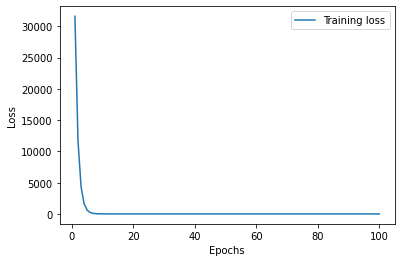

In [22]:
epochs = np.arange(1, epochs+1)
plt.plot(epochs, cost, label='Training loss')
#plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 5. Test

tensor([[152.],
        [185.],
        [180.],
        [196.],
        [142.],
        [101.],
        [149.],
        [115.],
        [175.],
        [164.],
        [141.],
        [141.],
        [184.],
        [152.],
        [148.],
        [192.],
        [147.],
        [183.],
        [177.],
        [159.],
        [177.],
        [175.],
        [175.],
        [149.],
        [192.]]) tensor([[153.7043],
        [185.4155],
        [182.3491],
        [198.3342],
        [141.8260],
        [104.3137],
        [147.9404],
        [108.9111],
        [173.1624],
        [159.9286],
        [143.0007],
        [141.2242],
        [188.6492],
        [157.2477],
        [148.6989],
        [187.8529],
        [150.2821],
        [177.1912],
        [179.7870],
        [160.7628],
        [173.6436],
        [173.6714],
        [165.5725],
        [155.5736],
        [192.1595]])


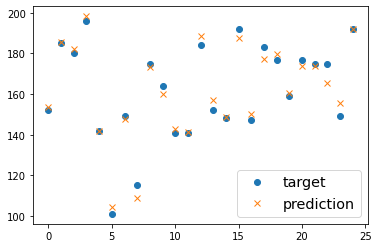

In [24]:
x_test = torch.FloatTensor([[95., 100., 80]])
with torch.no_grad():
  y_pred = model(x_data)  # predicted output

print(y_data, y_pred)
plt.plot(y_data, 'o', label='target')
plt.plot(y_pred, 'x', label='prediction')

plt.legend(fontsize='x-large')
plt.show()